In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("climate_survey-2023.xlsx")

In [3]:
df.describe()

,id,area,sex,age,edu,job,marry,child,income,pol,...,motive6,motive7,motive8,motive9,motive10,motive11,motive12,motive_moral,motive_me,motive_com
count,3.088000e+03,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,2889.000000,...,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,7.238860e+05,7.050194,0.496438,45.293394,2.543394,6.852979,1.721179,0.582902,5.178109,2.964001,...,3.887306,4.362047,4.298899,4.451101,4.343912,4.433290,4.491580,3.972636,3.912306,4.407383
std,3.439020e+05,4.591411,0.500068,13.848762,0.644476,2.937380,0.595016,0.493159,2.560574,0.874432,...,0.814268,0.743230,0.799481,0.735207,0.780132,0.763658,0.749426,0.695778,0.617846,0.657328
min,1.220000e+02,1.000000,0.000000,19.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.196480e+05,2.000000,0.000000,34.000000,2.000000,5.000000,1.000000,0.000000,3.000000,2.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.500000,3.600000,4.000000
50%,7.357820e+05,8.000000,0.000000,46.000000,2.000000,6.000000,2.000000,1.000000,5.000000,3.000000,...,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.600000
75%,1.051656e+06,10.000000,1.000000,57.000000,3.000000,9.000000,2.000000,1.000000,7.000000,4.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,4.400000,5.000000
max,1.267057e+06,17.000000,1.000000,69.000000,4.000000,12.000000,3.000000,1.000000,11.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
# 0: male, 1: female 
value_counts = df['sex'].value_counts()
print(value_counts) 
print("0: male, 1: female ")

0    1555
1    1533
Name: sex, dtype: int64
0: male, 1: female 


In [17]:
X_cols = ['concern', 'aware_cause', 'aware_solve', 
          'satis_mean2', 'aware_tot', 
          'risk', 'risk_me', 'impact_n', 'import_me',
          'eco_at', 'prior_eco', 
          'behave_me', 'behave_other']
D_cols = ['damage_me', 'damage_family', 'damage_commun', 
          'damage_country', 'damage_country_high', 'damage_country_low', #damage_country
          'damage_future', 'damage_org']
distance_cols = ['distance_index', 'distance_weighted']
motive_cols = ['motive_moral', 'motive_me', 'motive_com']

Y_cols = ['prac_tot']
C_cols = ['sex', 'area', 'edu', 'job', 'child', 'income', 'pol', 
          'media_trust', 'life_satis']

### 독립변인과 종속변인 관계

In [18]:
data = df[X_cols + D_cols + Y_cols + motive_cols + distance_cols]

correlation_matrix = data.corr()
print(correlation_matrix)

                      concern  aware_cause  aware_solve  satis_mean2  \
concern              1.000000     0.489254     0.430080    -0.096618   
aware_cause          0.489254     1.000000     0.628421    -0.055433   
aware_solve          0.430080     0.628421     1.000000    -0.018203   
satis_mean2         -0.096618    -0.055433    -0.018203     1.000000   
aware_tot            0.333605     0.370999     0.340797    -0.059741   
risk                 0.285515     0.211431     0.156452    -0.251950   
risk_me              0.292536     0.231842     0.187387    -0.276433   
impact_n             0.127686     0.084897     0.039579    -0.138697   
import_me            0.363059     0.240068     0.202326    -0.227053   
eco_at               0.355673     0.166501     0.147586    -0.149191   
prior_eco            0.269781     0.133657     0.097572    -0.194098   
behave_me            0.311381     0.207281     0.169290    -0.082990   
behave_other         0.202071     0.153168     0.139706     0.01

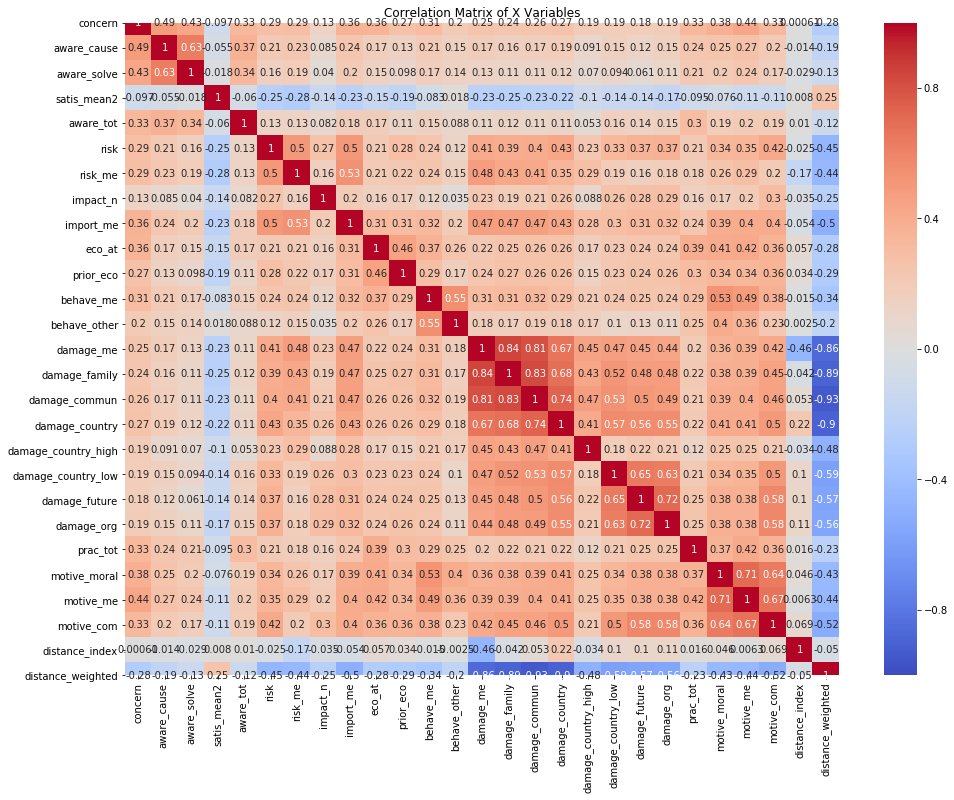

In [19]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of X Variables')
plt.show()

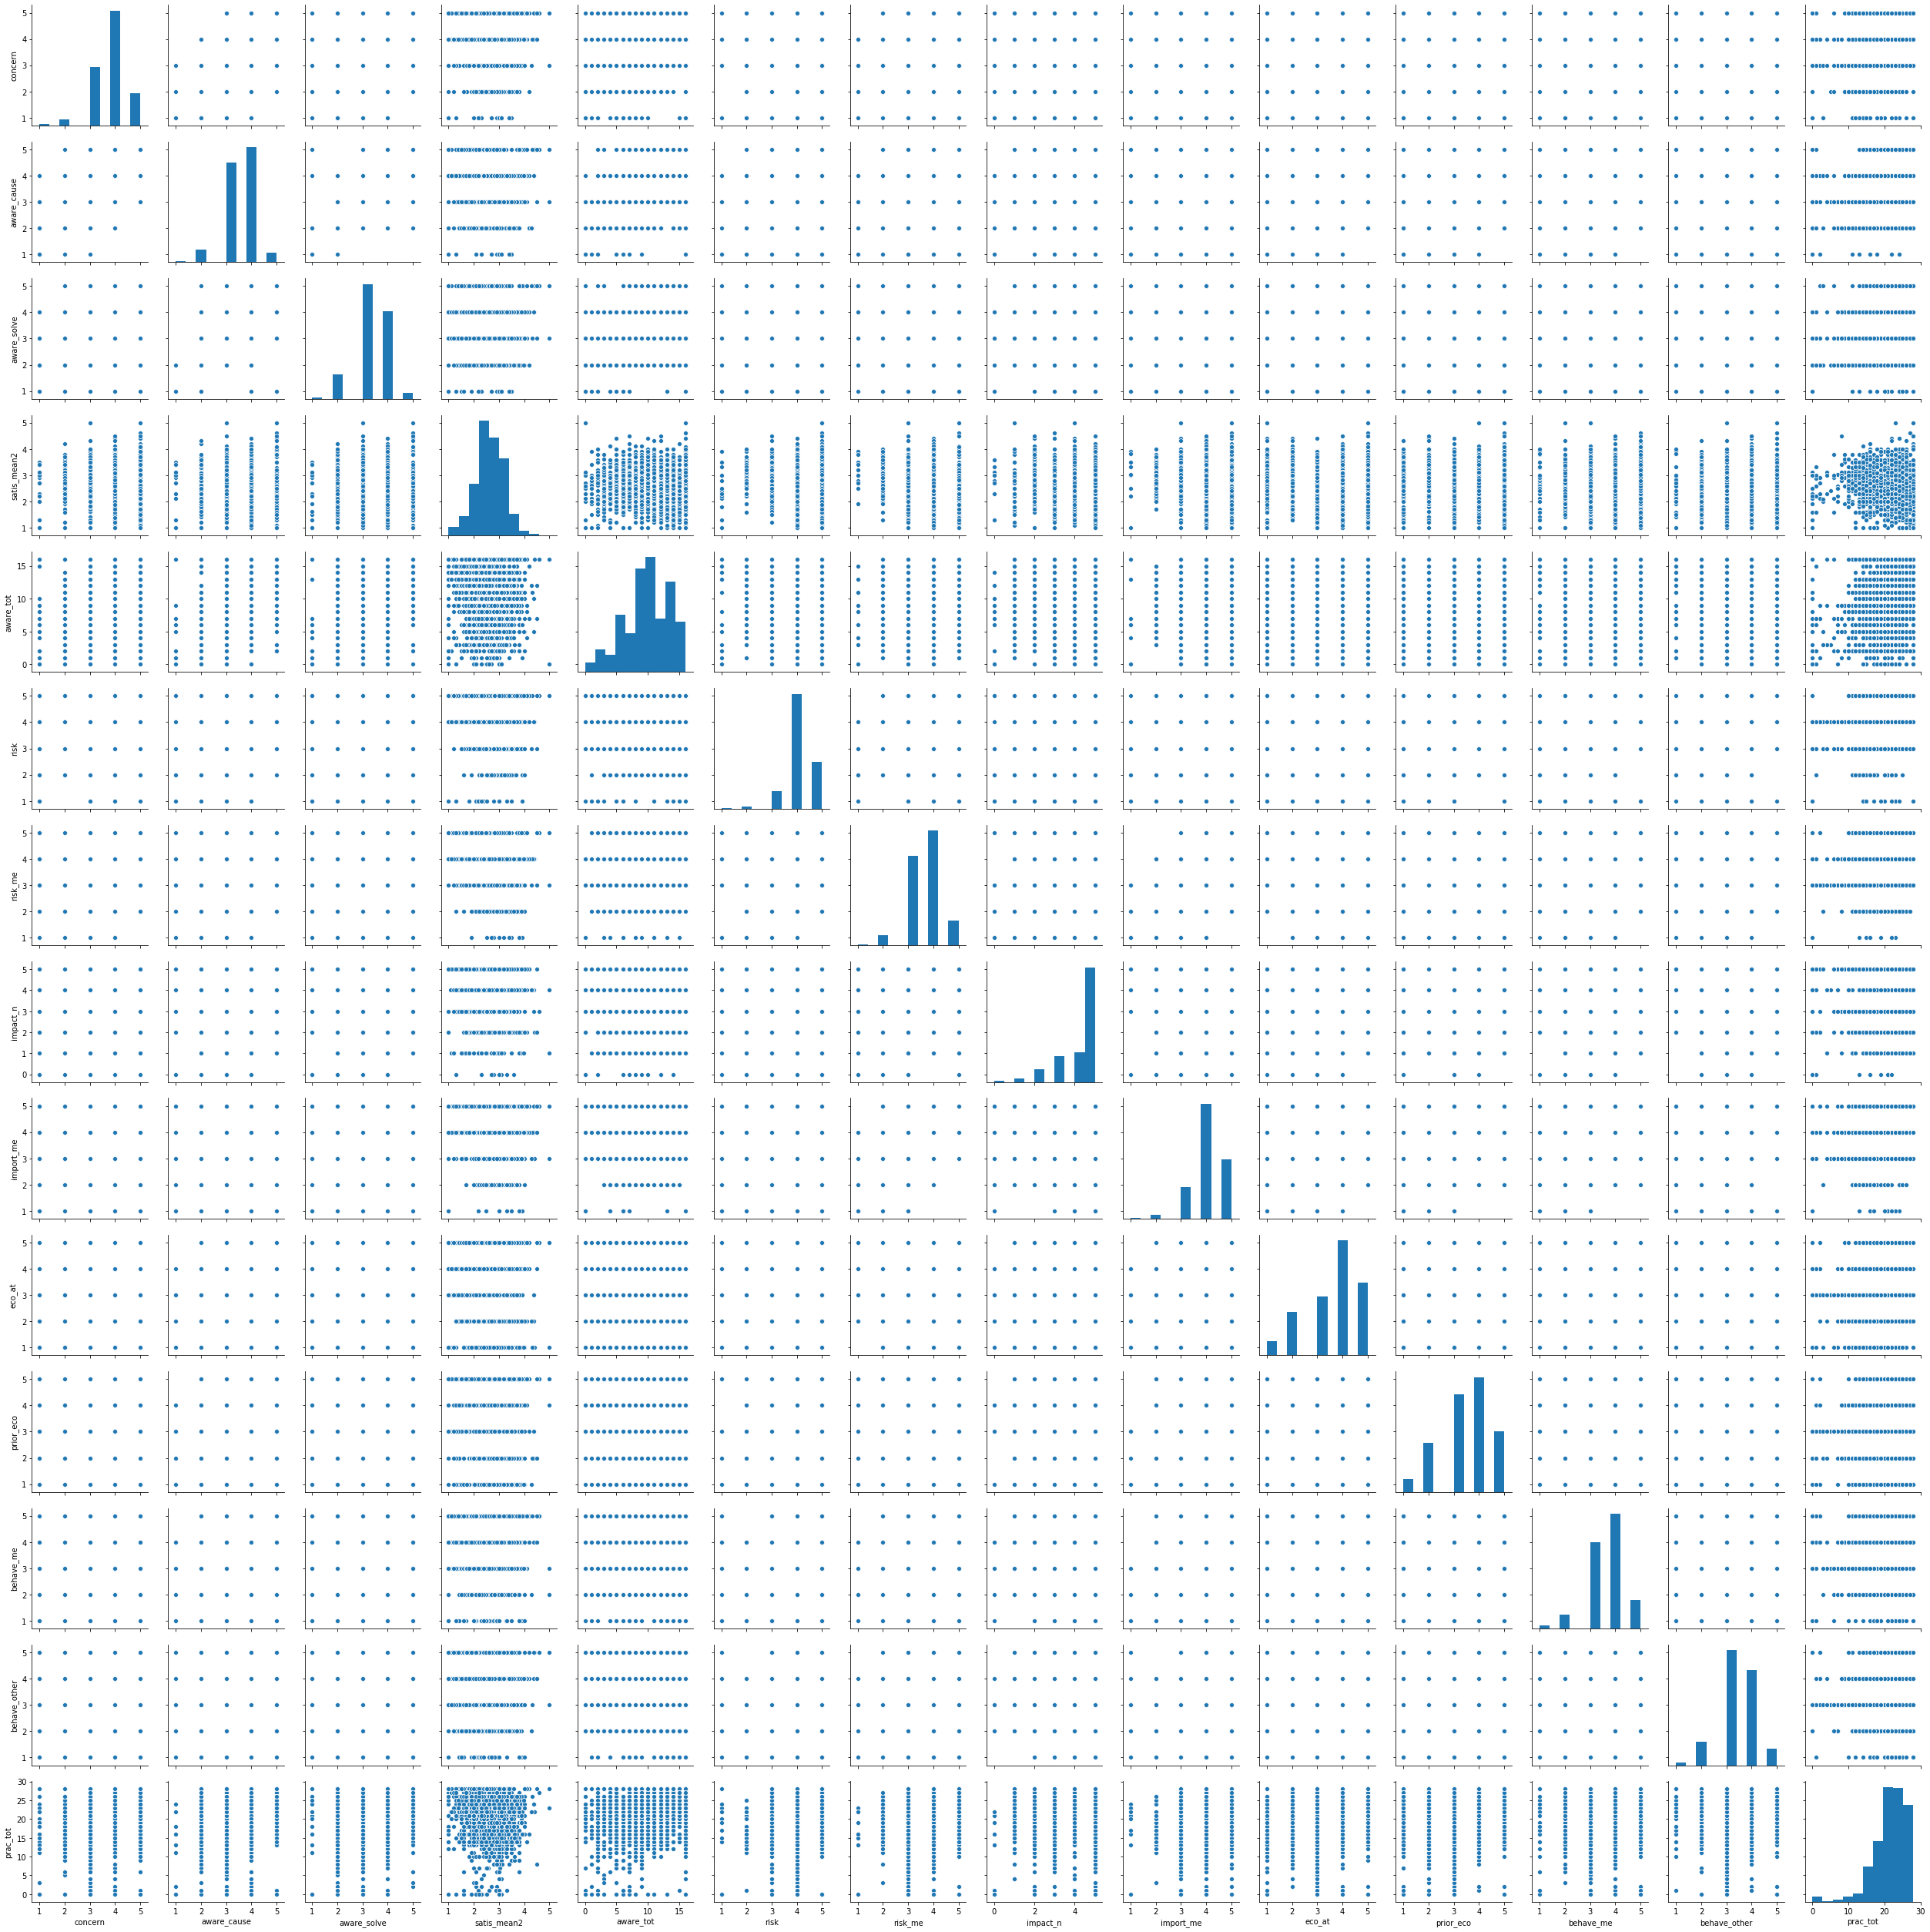

In [14]:
data = df[X_cols + Y_cols]
sns.pairplot(data)
plt.show()

### 통제변인과 종속변인

In [9]:
dataC = df[C_cols + Y_cols]

correlation_matrix_C = dataC.corr()
print(correlation_matrix_C)

                  sex      area       edu       job     child    income  \
sex          1.000000 -0.020309 -0.072393  0.190846  0.088549  0.003531   
area        -0.020309  1.000000 -0.064614  0.012485  0.072483 -0.054821   
edu         -0.072393 -0.064614  1.000000  0.024248 -0.135668  0.308020   
job          0.190846  0.012485  0.024248  1.000000 -0.075218 -0.070166   
child        0.088549  0.072483 -0.135668 -0.075218  1.000000  0.152483   
income       0.003531 -0.054821  0.308020 -0.070166  0.152483  1.000000   
pol         -0.037681 -0.054207 -0.038243  0.034214  0.033377 -0.021918   
media_trust  0.078216  0.040987 -0.036955  0.011431  0.021321 -0.023170   
life_satis   0.069189  0.036443  0.151679  0.002837  0.126658  0.274468   
prac_tot     0.056215 -0.004188  0.049986  0.007048  0.220486  0.124464   

                  pol  media_trust  life_satis  prac_tot  
sex         -0.037681     0.078216    0.069189  0.056215  
area        -0.054207     0.040987    0.036443 -0.004188

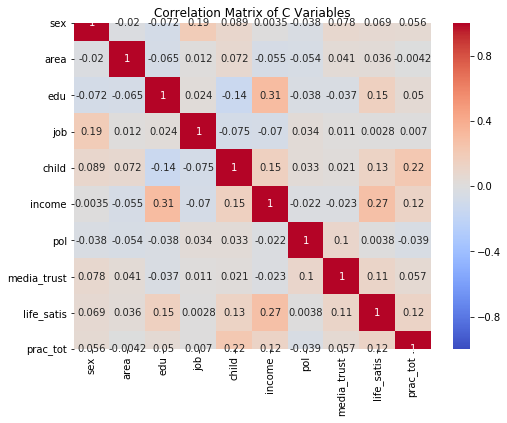

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_C, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of C Variables')
plt.show()

/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


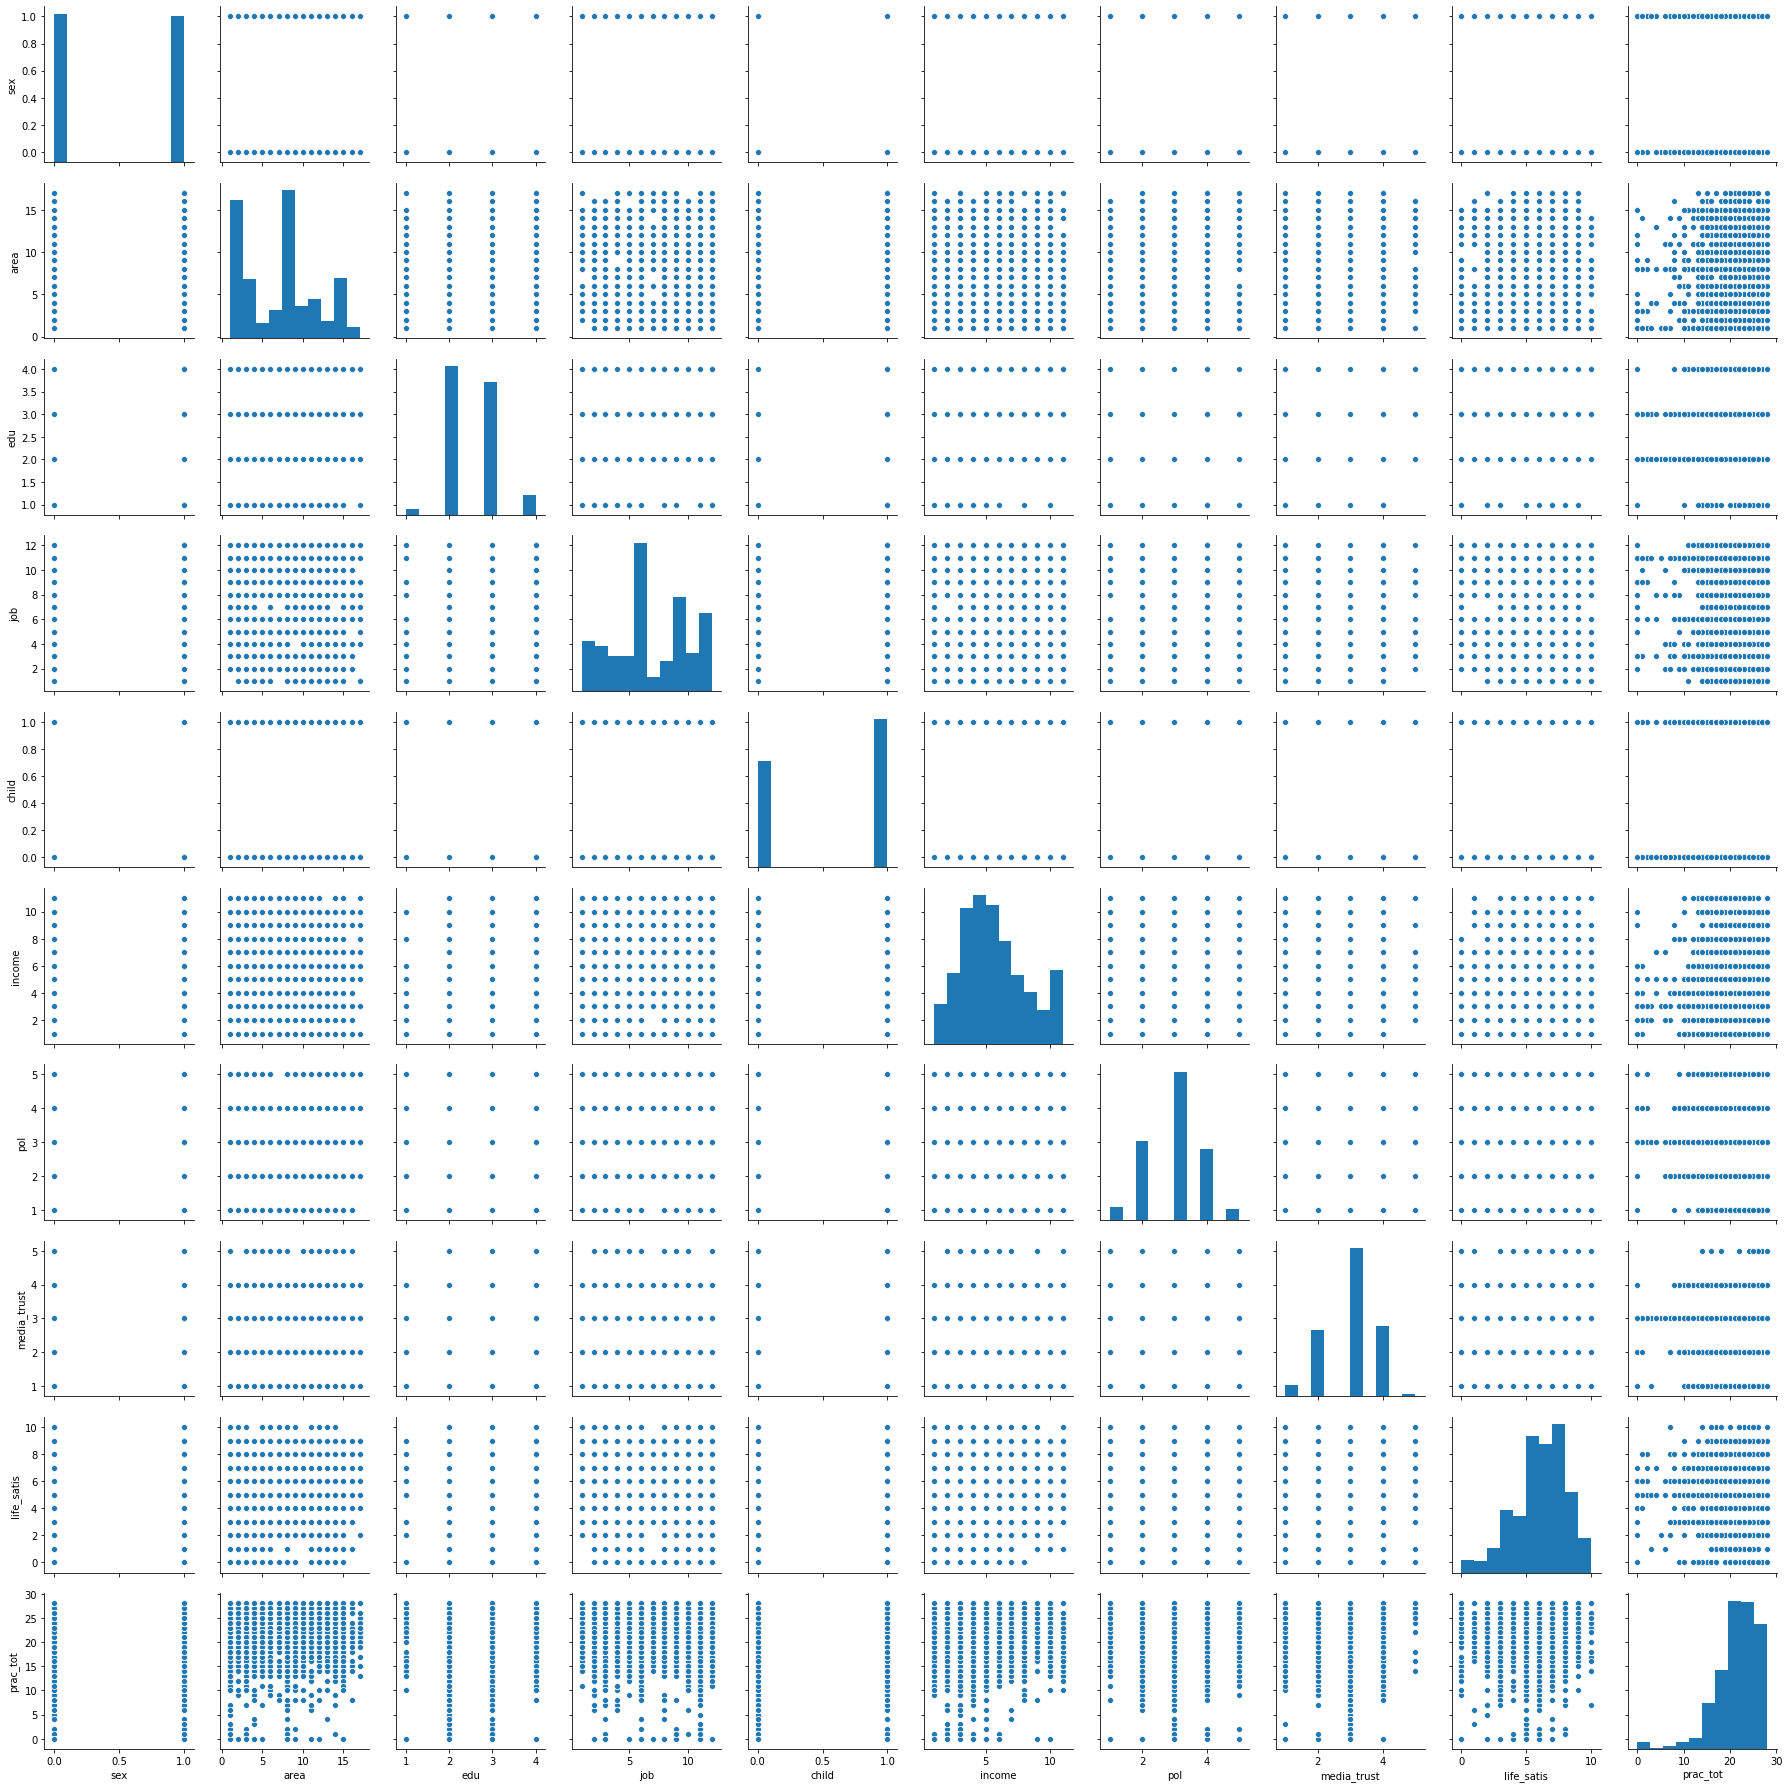

In [11]:
sns.pairplot(dataC)
plt.show()